# Data Loading & Dynamic Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

dataset_dir = r"D:\Suvan's Projects\FYP\EditAugment"

# Resize images to 224x224 as required by VGG-19
imageSize = (224, 224)

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift width by up to 20%
    height_shift_range=0.2, # Shift height by up to 20%
    shear_range=0.2,        # Apply shear transformation
    zoom_range=0.2,         # Random zooming
    horizontal_flip=True,   # Flip images horizontally
    brightness_range=[0.8, 1.2]  # Adjust brightness randomly
)

# Normalization only for validation and test sets
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "train"),
    target_size=imageSize,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_dir, "val"),
    target_size=imageSize,
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_dir, "test"),
    target_size=imageSize,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

stressTest_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "stressTest"),
    target_size=imageSize,
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 1455 images belonging to 4 classes.
Found 64 images belonging to 4 classes.
Found 63 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


# Building the Baseline CNN model

C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.2695 - loss: 7.2373 - val_accuracy: 0.2969 - val_loss: 1.3658
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - accuracy: 0.3749 - loss: 1.2812 - val_accuracy: 0.4219 - val_loss: 1.2241
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 405ms/step - accuracy: 0.4348 - loss: 1.1969 - val_accuracy: 0.5156 - val_loss: 1.1776
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.4865 - loss: 1.1409 - val_accuracy: 0.4531 - val_loss: 1.1461
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 415ms/step - accuracy: 0.5458 - loss: 1.1016 - val_accuracy: 0.5156 - val_loss: 1.0576
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.5623 - loss: 1.0319 - val_accuracy: 0.5938 - val_loss: 1.0167
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 422ms/step - accuracy: 0.5880 - loss: 0.9843 - val_accuracy: 0.6406 - val_loss: 0.9085
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.6013 - loss: 0.9430 - val_accu

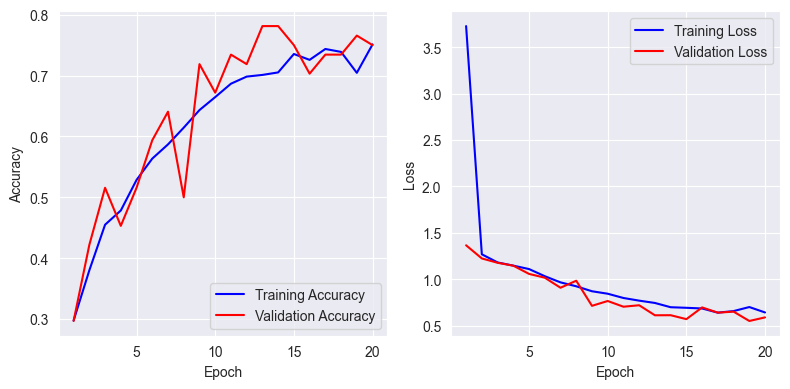

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


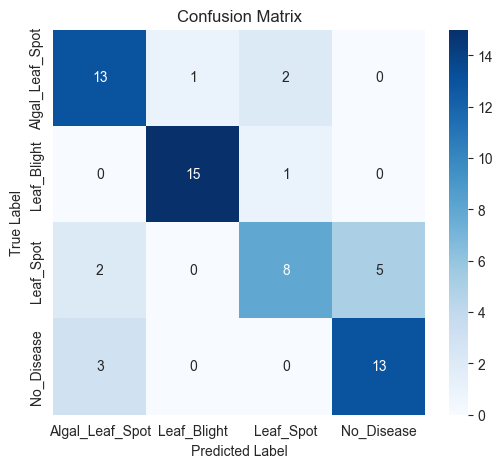

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.72      0.81      0.76        16
    Leaf_Blight       0.94      0.94      0.94        16
      Leaf_Spot       0.73      0.53      0.62        15
     No_Disease       0.72      0.81      0.76        16

       accuracy                           0.78        63
      macro avg       0.78      0.77      0.77        63
   weighted avg       0.78      0.78      0.77        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8102 - loss: 0.5386


C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.6583 - loss: 0.8148
Test Accuracy: 77.78%
Stress Test Accuracy: 66.67%


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    MaxPooling2D(2,2),  # Reduce spatial dimensions

    Flatten(),  # Convert to 1D
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs=20)

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

# **Fine-Tuning 1**
*   Added a convolutional layer with 64 filters/kernels

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.2975 - loss: 4.9617 - val_accuracy: 0.5156 - val_loss: 1.2498
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 454ms/step - accuracy: 0.4432 - loss: 1.1780 - val_accuracy: 0.5312 - val_loss: 1.1089
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 460ms/step - accuracy: 0.5489 - loss: 1.0269 - val_accuracy: 0.5469 - val_loss: 1.1316
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 461ms/step - accuracy: 0.6056 - loss: 0.9594 - val_accuracy: 0.6562 - val_loss: 0.9730
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 453ms/step - accuracy: 0.5973 - loss: 0.9490 - val_accuracy: 0.5938 - val_loss: 1.0479
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step - accuracy: 0.6157 - loss: 0.9076 - val_accuracy: 0.6250 - val_loss: 0.8319
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 471ms/step - accuracy: 0.6391 - loss: 0.8441 - val_accuracy: 0.6250 - val_loss: 0.8892
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 503ms/step - accuracy: 0.6572 - loss: 0.8607 - val_accu

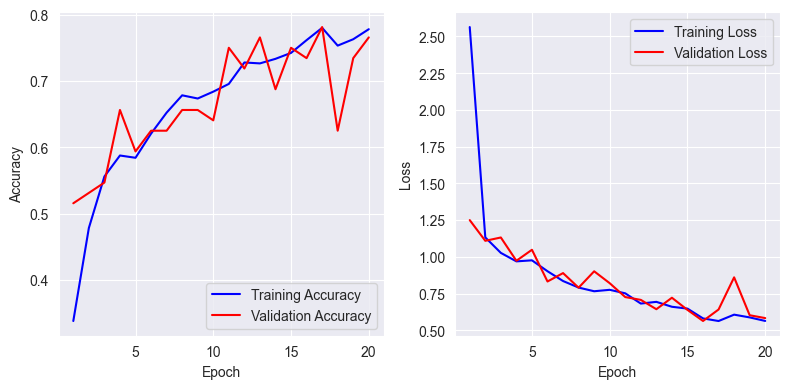

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


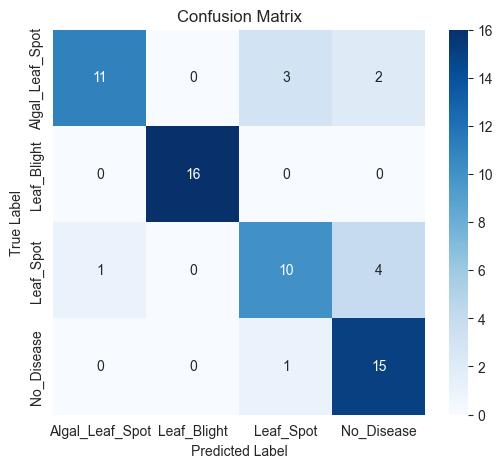

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.92      0.69      0.79        16
    Leaf_Blight       1.00      1.00      1.00        16
      Leaf_Spot       0.71      0.67      0.69        15
     No_Disease       0.71      0.94      0.81        16

       accuracy                           0.83        63
      macro avg       0.84      0.82      0.82        63
   weighted avg       0.84      0.83      0.82        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8315 - loss: 0.3742


C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.6994 - loss: 0.8329
Test Accuracy: 82.54%
Stress Test Accuracy: 73.41%


In [4]:
# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    MaxPooling2D(2,2),  # Reduce spatial dimensions
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    MaxPooling2D(2,2),  # Reduce spatial dimensions

    Flatten(),  # Convert to 1D
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs=20)

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

# **Fine-Tuning 2**
*   Added 2 convolutional layers with 128 filters/kernels
*   Decreased learning rate from 0.001 to 0.0001
*   Added BatchNormalizaion layers


C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 759ms/step - accuracy: 0.4292 - loss: 1.6575 - val_accuracy: 0.2500 - val_loss: 5.7676
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 759ms/step - accuracy: 0.5773 - loss: 0.9730 - val_accuracy: 0.2500 - val_loss: 9.0540
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.6254 - loss: 0.8379 - val_accuracy: 0.2500 - val_loss: 10.1745
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 748ms/step - accuracy: 0.7019 - loss: 0.7204 - val_accuracy: 0.2500 - val_loss: 10.9745
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 758ms/step - accuracy: 0.7392 - loss: 0.6580 - val_accuracy: 0.2500 - val_loss: 7.5240
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 756ms/step - accuracy: 0.7762 - loss: 0.5598 - val_accuracy: 0.2656 - val_loss: 5.3789
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 736ms/step - accuracy: 0.8038 - loss: 0.5420 - val_accuracy: 0.2969 - val_loss: 4.9547
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 764ms/step - accuracy: 0.7775 - loss: 0.5817 - val_ac

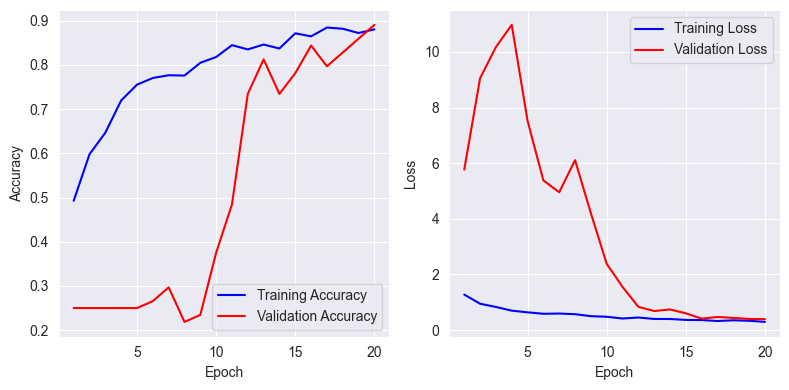

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017C6B12D300> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


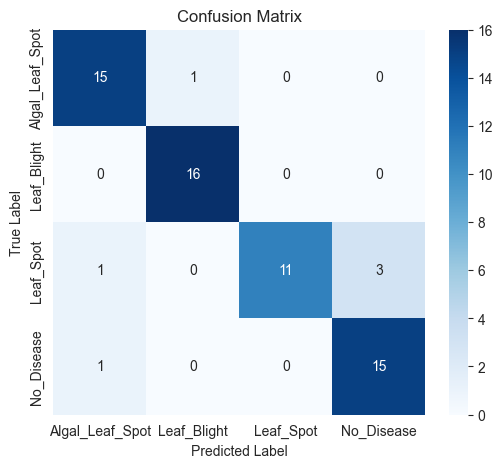

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.88      0.94      0.91        16
    Leaf_Blight       0.94      1.00      0.97        16
      Leaf_Spot       1.00      0.73      0.85        15
     No_Disease       0.83      0.94      0.88        16

       accuracy                           0.90        63
      macro avg       0.91      0.90      0.90        63
   weighted avg       0.91      0.90      0.90        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9261 - loss: 0.2378
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.8335 - loss: 0.5152
Test Accuracy: 90.48%
Stress Test Accuracy: 82.54%


In [5]:
from tensorflow.keras.layers import BatchNormalization

# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    BatchNormalization(), # To stabilize training process
    MaxPooling2D(2,2),  # Reduce spatial dimensions
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'), # Hidden dense layer

    Dense(4, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs=20)

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

# **Fine-Tuning 3**
*   Changed the neurons in dense layer from 64 to 128
*   Added another convolutional layer with 256 kernels
*   Added kernel initializer 'HeNormal'


C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 814ms/step - accuracy: 0.4226 - loss: 1.8989 - val_accuracy: 0.2500 - val_loss: 3.4985
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 820ms/step - accuracy: 0.6207 - loss: 0.8887 - val_accuracy: 0.2500 - val_loss: 5.6607
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 808ms/step - accuracy: 0.7264 - loss: 0.7014 - val_accuracy: 0.2500 - val_loss: 6.1445
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 822ms/step - accuracy: 0.7829 - loss: 0.5582 - val_accuracy: 0.2500 - val_loss: 5.4429
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 841ms/step - accuracy: 0.7896 - loss: 0.5616 - val_accuracy: 0.3594 - val_loss: 4.4725
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8293 - loss: 0.4640 - val_accuracy: 0.2812 - val_loss: 3.5362
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 43s 926ms/step - accuracy: 0.8508 - loss: 0.4026 - val_accuracy: 0.2500 - val_loss: 2.5561
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 879ms/step - accuracy: 0.8482 - loss: 0.4089 - val_accurac

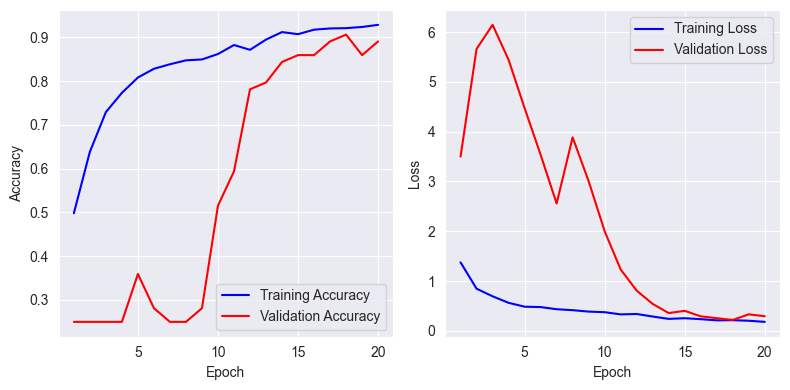

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step


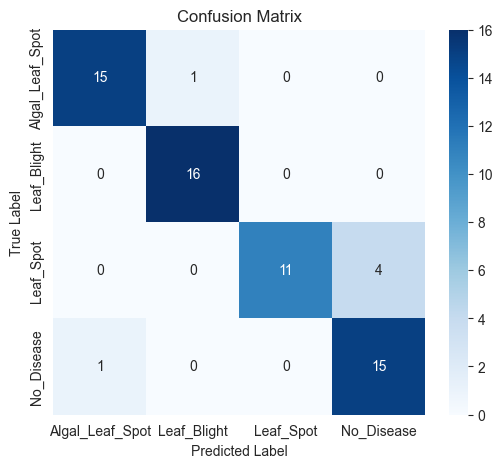

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.94      0.94      0.94        16
    Leaf_Blight       0.94      1.00      0.97        16
      Leaf_Spot       1.00      0.73      0.85        15
     No_Disease       0.79      0.94      0.86        16

       accuracy                           0.90        63
      macro avg       0.92      0.90      0.90        63
   weighted avg       0.92      0.90      0.90        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9261 - loss: 0.2177
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.8423 - loss: 0.4401
Test Accuracy: 90.48%
Stress Test Accuracy: 83.33%


In [6]:
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    BatchNormalization(), # To stabilize training process
    MaxPooling2D(2,2),  # Reduce spatial dimensions
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer= 'HeNormal'), # Hidden dense layer

    Dense(4, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs= 20)

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

# **Fine-Tuning 4**
*   Added a dense layer with 64 neurons.

C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 850ms/step - accuracy: 0.4299 - loss: 1.4974 - val_accuracy: 0.2031 - val_loss: 1.7079
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 805ms/step - accuracy: 0.6716 - loss: 0.8494 - val_accuracy: 0.2500 - val_loss: 2.0180
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 801ms/step - accuracy: 0.7263 - loss: 0.7075 - val_accuracy: 0.2500 - val_loss: 2.1016
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 800ms/step - accuracy: 0.7656 - loss: 0.5941 - val_accuracy: 0.2500 - val_loss: 2.1878
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 797ms/step - accuracy: 0.8133 - loss: 0.5066 - val_accuracy: 0.2500 - val_loss: 2.4673
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 799ms/step - accuracy: 0.8019 - loss: 0.5071 - val_accuracy: 0.3906 - val_loss: 1.3010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 794ms/step - accuracy: 0.8512 - loss: 0.4232 - val_accuracy: 0.2188 - val_loss: 1.9041
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 807ms/step - accuracy: 0.8799 - loss: 0.3675 - val_accu

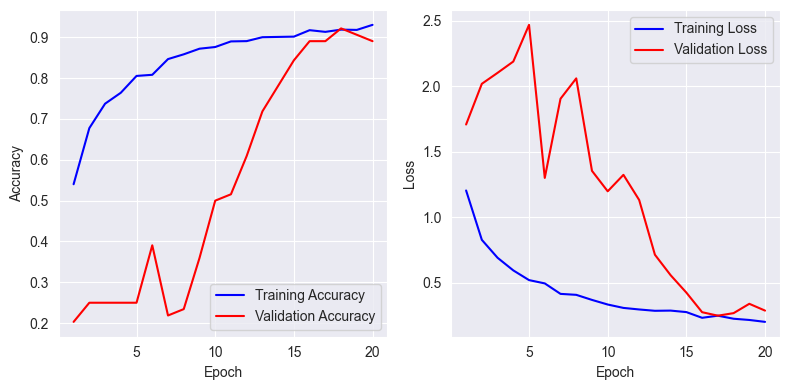

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


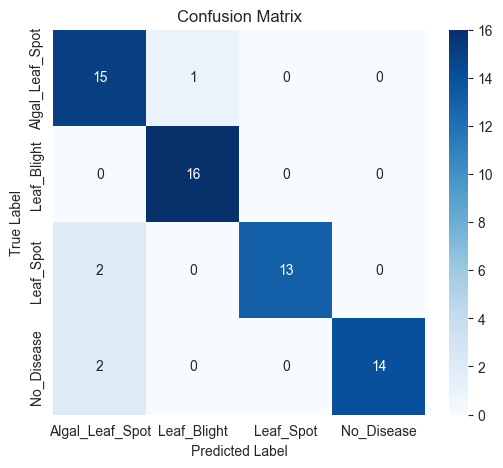

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.79      0.94      0.86        16
    Leaf_Blight       0.94      1.00      0.97        16
      Leaf_Spot       1.00      0.87      0.93        15
     No_Disease       1.00      0.88      0.93        16

       accuracy                           0.92        63
      macro avg       0.93      0.92      0.92        63
   weighted avg       0.93      0.92      0.92        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9367 - loss: 0.2093
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.8571 - loss: 0.4035
Test Accuracy: 92.06%
Stress Test Accuracy: 80.16%


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    BatchNormalization(), # To stabilize training process
    MaxPooling2D(2,2),  # Reduce spatial dimensions
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer= 'HeNormal'), # Hidden dense layer
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer= 'HeNormal'), # Hidden dense layer

    Dense(4, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs= 20)

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

## Hyperparameter Tuning

In [8]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def build_tuned_model_advanced(hp):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())

    # Tune the number of units in the first dense layer
    model.add(Dense(units=hp.Int('dense_units_1', min_value=64, max_value=256, step=64),
                    activation='relu', kernel_initializer='HeNormal'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0, max_value=0.5, step=0.1)))

    # Tune the presence and size of the second dense layer
    if hp.Boolean('use_dense_2'):
        model.add(Dense(units=hp.Int('dense_units_2', min_value=32, max_value=128, step=32),
                        activation='relu', kernel_initializer='HeNormal'))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0, max_value=0.5, step=0.1)))

    model.add(Dense(4, activation='softmax'))

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.00025, 0.0005])

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    build_tuned_model_advanced,
    objective='val_accuracy',
    max_epochs=30,
    factor= 4,
    directory='advanced_tuning',
    project_name='disease_paramTune'
)

tuner.search(train_generator, validation_data=val_generator, epochs=50,)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from advanced_tuning\disease_paramTune\tuner0.json
Best Hyperparameters: {'dense_units_1': 192, 'dropout_1': 0.30000000000000004, 'use_dense_2': False, 'optimizer': 'rmsprop', 'learning_rate': 0.00025, 'dense_units_2': 128, 'dropout_2': 0.2, 'tuner/epochs': 30, 'tuner/initial_epoch': 8, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0036'}


In [9]:
# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = best_model.evaluate(test_generator)
stress_loss, stress_acc = best_model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9577 - loss: 0.1310
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.9201 - loss: 0.2299
Test Accuracy: 93.65%
Stress Test Accuracy: 87.30%


Building the CNN model with best hyperparameters

C:\Users\Travi\PycharmProjects\FYP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 815ms/step - accuracy: 0.4208 - loss: 4.8755 - val_accuracy: 0.2500 - val_loss: 2.7325
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 826ms/step - accuracy: 0.6112 - loss: 1.0141 - val_accuracy: 0.2500 - val_loss: 1.8393
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 805ms/step - accuracy: 0.6405 - loss: 0.9392 - val_accuracy: 0.2500 - val_loss: 5.0441
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 805ms/step - accuracy: 0.7139 - loss: 0.7866 - val_accuracy: 0.2500 - val_loss: 6.0899
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 778ms/step - accuracy: 0.7006 - loss: 0.7355 - val_accuracy: 0.2500 - val_loss: 6.8448
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 781ms/step - accuracy: 0.7553 - loss: 0.6581 - val_accuracy: 0.2500 - val_loss: 8.7151
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 775ms/step - accuracy: 0.7574 - loss: 0.6340 - val_accuracy: 0.2500 - val_loss: 11.9159
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 781ms/step - accuracy: 0.7961 - loss: 0.5929 - val_acc

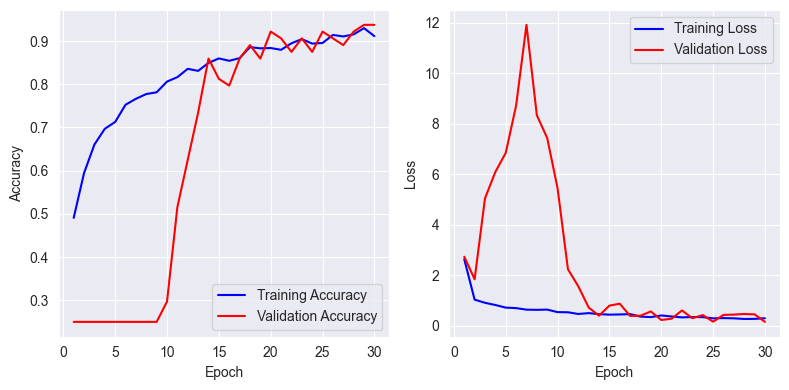

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


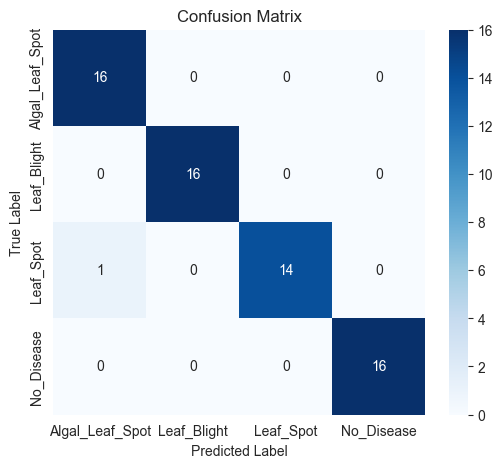

Classification Report:
                  precision    recall  f1-score   support

Algal_Leaf_Spot       0.94      1.00      0.97        16
    Leaf_Blight       1.00      1.00      1.00        16
      Leaf_Spot       1.00      0.93      0.97        15
     No_Disease       1.00      1.00      1.00        16

       accuracy                           0.98        63
      macro avg       0.99      0.98      0.98        63
   weighted avg       0.99      0.98      0.98        63

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9894 - loss: 0.0758
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.8425 - loss: 0.8431
Test Accuracy: 98.41%
Stress Test Accuracy: 83.73%


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Define Baseline CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Feature extraction
    BatchNormalization(), # To stabilize training process
    MaxPooling2D(2,2),  # Reduce spatial dimensions
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(192, activation='relu', kernel_initializer= 'HeNormal'), # Hidden dense layer
    Dropout(0.3),


    Dense(4, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data= val_generator, epochs= 30)

acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs = range(1,len(acc2) +1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
axes[0].plot(epochs, acc2, 'b', label= 'Training Accuracy')
axes[0].plot(epochs, val_acc2, 'r', label= 'Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label= 'Training Loss')
axes[1].plot(epochs, val_loss2, 'r', label= 'Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Get the true labels from the validation generator
true_labels = test_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(test_generator.class_indices.keys())

# Get model predictions (probabilities)
pred_probs = model.predict(test_generator)

# Convert probabilities to class indices
pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)

# Evaluating Model with Test & Stress-Test data
test_loss, test_acc = model.evaluate(test_generator)
stress_loss, stress_acc = model.evaluate(stressTest_generator)
print("================================")
print(f"Test Accuracy: {test_acc* 100:.2f}%")
print(f"Stress Test Accuracy: {stress_acc * 100:.2f}%")
print("================================")

In [3]:
best_model.summary()
best_model.save("CNN_model.keras")

NameError: name 'best_model' is not defined